## Меры качества алгоритмов распознавания изображений

Task statement: оценка алгоритмов распознавания образов с помощью интуитивно понятных и объясняемых метрик.

Для каждой задачи (классификация, регрессия, детекция и проч.) определяется своя метрика качества работы алгоритма. Пример:
- Классификация:
    - Доля правильно распознаных ответов (accuracy)
    - Точность (precision)
    - Полнота (recall)
    - Средняя точность (AP)
- Регрессия:
    - Средняя абсолютная ошибка (MAE)
    - Коэффициент детерминации ($R^2$)
    - Cредняя абсолютная процентная ошибка (MAPE)
- Детекция:
    - Коэффициент Жаккара (IoU)
    - mAP
- Трекинг:
    - MOTA
    - HOTA
    
Хороший обзор на базовые метрики классификации и регрессии от Евгения Соколова (ВШЭ) можно найти [тут](http://www.machinelearning.ru/wiki/images/1/1c/sem06_metrics.pdf).

In [ ]:
%%bash

wget \
    https://raw.githubusercontent.com/avbokovoy/MIPT-Computer_vision-2020/master/7-Metrics/homework/classification_results.txt \
    -O classification_results.txt \
    -q

In [ ]:
import pandas as pd
import sklearn
import numpy as np

In [ ]:
df = pd.read_csv(
    filepath_or_buffer='classification_results.txt',
    sep=' ',
    names=['actual','predicted'],
)
print('Actual classes:', sorted(df['actual'].unique()))

### Регрессия

Пример: получение оптимальных коэффициентов прямой. Какая метрика подойдет в этом случае?
![text](https://media.proglib.io/wp-uploads/2018/03/1_IjxpxWcKX8EJUVFBNFeKdA.gif)

MSE применяется в ситуациях, когда нам надо подчеркнуть большие ошибки и выбрать модель, которая дает меньше больших ошибок прогноза. Грубые ошибки становятся заметнее за счет того, что ошибку прогноза мы возводим в квадрат. И модель, которая дает нам меньшее значение среднеквадратической ошибки, можно сказать, что что у этой модели меньше грубых ошибок.

Среднеквадратичный функционал MSE сильнее штрафует за большие отклонения по сравнению со среднеабсолютным MAE, и поэтому более чувствителен к выбросам. При использовании любого из этих двух функционалов может быть полезно проанализировать, какие объекты вносят наибольший вклад в общую ошибку — не исключено, что на этих объектах была допущена ошибка при вычислении признаков или целевой величины.

Среднеквадратичная ошибка MSE подходит для сравнения двух моделей или для контроля качества во время обучения, но не позволяет сделать выводов о том, на сколько хорошо данная модель решает задачу. Например, MSE = 10 является очень плохим показателем, если целевая переменная принимает значения от 0 до 1, и очень хорошим, если целевая переменная лежит в интервале (10000, 100000). В таких ситуациях вместо среднеквадратичной ошибки полезно использовать коэффициент детерминации $R^2$.

Вопрос 0. Реализуйте MSE, MAE и R^2. Сравните их с `sklearn.metrics`.

### Классификация

<!--
{| border="0" align="center" style="text-align: center; background: #FFFFFF;"
|+
!
! colspan="2" style="background: #ddffdd;"|actual class <br/> (observation)
|-
!
|-----
|+
! rowspan="2" style="background: #ffdddd;"|predicted class <br/> (expectation)
| '''tp''' <br /> (true positive) <br/> Correct result
| '''fp''' <br /> (false positive) <br/> Unexpected result
|-bgcolor="#EFEFEF"
| '''fn''' <br /> (false negative) <br/> Missing result
| '''tn''' <br /> (true negative) <br/> Correct absence of result
|+
|}

-->

### Бинарная классификация

Матрица ошибок (confusion matrix)

|          | y = 1 | y = 0 |
|    ---   |  ---  |  ---  |
| a(x) = 1 | Истинно положительный (TP)| Ложно-положительный (FP)|
| a(x) = 0 | Ложно-отрицательный (FN)  | Истинно-отрицательный (TN)|

Метрики:
- Accuracy = $\frac{TP + FN}{TP + FN + FP + FN}$
- Precision = $\frac{TP}{TP + FP}$
- Recall = $\frac{TP}{TP + FN}$

### Многоклассовая классификация

Матрица ошибок (confusion matrix) для 3 классов (пример)

|          | y = 2 | y = 1 | y = 0 |
|    ---   |  ---  |  ---  |  ---  |
| a(x) = 2 | $a_{1,1}$ | $a_{1,2}$ | $a_{1,3}$ |
| a(x) = 1 | $a_{2,1}$ | $a_{2,2}$ | $a_{2,3}$ |
| a(x) = 0 | $a_{3,1}$ | $a_{3,2}$ | $a_{3,3}$ |

Например, расчет для класса 2:
- TP: $a_{1,1}$
- FP: $a_{1,2} + a_{1,3}$
- FN: $a_{2,1} + a_{3,1}$
- TN: неопределен

Среднее по классам: `micro` и `macro`, `weighted`
- micro: суммирование всех TP, FP, FN в классах и вычисление финальной метрики
- macro: вычисление метрики в каждом классе и взятие взвешенной суммы (вес каждого - 1 / кол-во классов)
- weighted: вычисление метрики в каждом классе и взятие взвешенной суммы (вес каждого - кол-во элементов в классе / кол-во элементов всего)

Вопрос 1. Составьте confusion matrix и посчитайте приведенные метрики на скаченном наборе данных. Сравните их со стандартными реализациями в `sklearn.metrics`.

In [ ]:
#TODO

Вопрос 2. Хороша ли метрика accuracy в мульклассовой классификациии? Почему?

In [10]:
#TODO

### Дополнительная глава. Построение кривых уверенности.

1. ROC кривая. Можно почитать [тут](https://dyakonov.org/2017/07/28/auc-roc-площадь-под-кривой-ошибок/). Как следствие - ROC-AUC метрика для классификации. Проблема - чувсвительность к дисбалансу классов.
2. PR кривая. Алгоритм построения кривой указан [тут](http://www.machinelearning.ru/wiki/images/1/1c/sem06_metrics.pdf) на странице 8. Как следствие - метрика AP.

Дополнительную информацию о взаимоотношениях между ROC и PR кривой можно почитать [тут](https://pages.cs.wisc.edu/~jdavis/davisgoadrichcamera2.pdf).

In [39]:
#сводим мультиклассовую задачу к одноклассовой с помощью клиппинга

zero_one_class_mask = (df['actual'] == 0) | (df['actual'] == 1)

y_true = df['actual'][zero_one_class_mask]
y_pred = df['predicted'][zero_one_class_mask]

#set clipped scores
probas = y_pred.clip(0, 1)

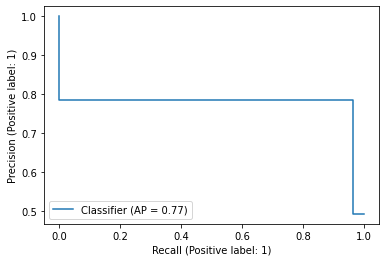

In [40]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_predictions(y_true, probas)

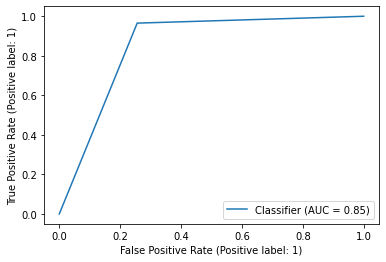

In [41]:
from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_predictions(y_true, probas)

### Детекция

Задача подсчета качества детекции сводится к подсчету классификации с помощью введения метрики схожести. Зачастую для сопоставления объектов берется метрика Intersection Over Union (IoU).

$IoU(A, B) = \frac{|A \cup B|}{|A \cap B|}$

Объекты для сравнения могут выступать в виде 2D/3D ограничивающих рамок или масок сегментации.

![text](https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/61e9cff8038fd36e52c7a192_HeKufHa.png)

Ограничивающий прямоугольник 2D может быть определен, используя всего 4 числа:
- координаты диагональных углов (xyxy)
- координаты центра и ширины, и длины (xywh)

Ограничивающий прямоугольник 3D может быть определен, используя всего 6 чисел:
- координаты центра (xyz), длина, ширина, высота (lhw), угол поворота ($\theta$)

Маска сегментации определяется через бинарную маску с размерами, равными исходному изображению.

![text](https://www.researchgate.net/publication/335876570/figure/fig2/AS:804291526795265@1568769451765/Intersection-over-Union-IOU-calculation-diagram.png)

In [45]:
# Вопрос 3. Реализуйте метрику IoU для ограничивающих 2D рамок.

'''
    0,0 ------> x (width)
     |
     |  (Left,Top)
     |      *_________
     |      |         |
     v      |         |
     y      |_________|
  (height)            *
                (Right,Bottom)
'''

def bb_iou(
    boxA: list[int],
    boxB: list[int],
) -> float:
    
    '''
    Intersection Over Union
    Inputs:
    boxA:  list[int], corner up left, corner down right.
    boxB:  list[int], corner up left, corner down right.
    
    Outputs:
    iou: float, Intersection Over Union
    '''
    
    #TODO
    
	return iou

TabError: inconsistent use of tabs and spaces in indentation (<ipython-input-45-c8b55f60b2ea>, line 19)

In [10]:
# tests
questions = [
    [[39, 63, 203, 112], [54, 66, 198, 114]],
    [[39, 63, 203, 112], [90, 63, 203, 112]],
    [[39, 63, 203, 112], [39, 63, 203, 112]],
    [[0, 0, 0, 0], [39, 63, 203, 112]],
]
answers = [
    0.798,
    0.691,
    1.,
    0.,
]

for question, answer in zip(questions, answers):
    
    first, second = question
    
    algo_out = bb_iou(first, second)
    
    assert np.allclose(
        a=answer,
        b=algo_out,
        rtol=1e-02,
    ), f'Test with {first} and {second} bboxes was filed. Got {algo_out}, expected {answer}.'
    
print('All done!')

All done!


Как вычислить метрику для результатов детекции? Прежде чем приступить к подсчету метрики, определимся с понятием объекта. Объект состоит из его характеристик локализации (2D/3D рамки, либо маски сегментации), класса объекта и уверенности в предсказании.

В общей постановке задачи, алгоритм выдает N объектов, а в нашей разметке содержится M объектов. Как же посчитать метрику качества?

Основная пробелема - матчинг объектов.

![test](https://manalelaidouni.github.io/assets/img/pexels/Detections_IoU_edit1-401ab064-29c4-4e74-8b34-b79b7b5cb6eb.png)

Основные шаги:
- определение трешхолда IoU (tr_iou). Если объект имеет тот же класс и IoU между предсказанной локализацией и  правильной локализацией. Если IoU >= tr_iou и совпадает класс, объект считатся TP, иначе FP.
- Необходимо найти лучший матчинг, для этого в первоначальном приближении используется Жадный алгоритм (поиск максимума по IoU), оптимальный алгоритм - Венгерский.
- непокрытые объекты в разметке помечаются как FN

Библиотеки, которые могу вести подсчет AP:
- https://github.com/rafaelpadilla/Object-Detection-Metrics
- https://github.com/cocodataset/cocoapi/tree/master/PythonAPI/pycocotools
- и другие.


In [2]:
#download segmentation results

%pip install -U --no-cache-dir gdown --pre
%pip install -U pycocotools

#predicted
!gdown \
    --id 10YDnKAzf-zsE0IguEyZh__QNwgJD7l2H \
    --fuzzy \
    -O epoch_30_test_00_00.segm.json
    
#ground truth
!gdown \
    --id 1pwyerjxRcHOEvjahMDPy3pjZuYSHLvZN \
    --fuzzy \
    -O test_00_00_instances.json

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gdown: filename=gdown-4.4.0-py3-none-any.whl size=14775 sha256=860878d89f2a30cfc8410fe38c095bb03cb949c770e7fbe15a8e03874014c884
  Stored in directory: /private/var/folders/43/vchb6g294j5847xg1vmhgk1c0000gn/T/pip-ephem-wheel-cache-h1p55aym/wheels/7d/37/b6/b2a79c75e898c0b8e46ff255102602d7159a10d9af0d80641a
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 4.2.0
    Uninstalling gdown-4.2.0:
      Successfully uninstalled gdown-4.2.0
Note: you may need to restart the kernel to use updated packages.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/

In [4]:
!python3 detection_metrics.py

loading annotations into memory...
Done (t=6.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=20.35s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=239.52s).
Accumulating evaluation results...
DONE (t=31.30s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.239
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.378
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.249
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.073
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.382
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.566
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.187
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.266
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | max

### Трекинг объектов (Multiple Object Tracing, MOT)

Требуется отслеживать несколько объектов. Ожидается, что алгоритм отслеживания, во-первых, определит количество объектов в каждом кадре, а во-вторых, будет отслеживать идентификацию каждого объекта от одного кадра к следующему.

Трекинг - сложная проблема: переключения идентификаторов трудно избежать, особенно в переполненных видео, а также количество объектов в каждом кадре неизвестны, поэтому алгоритмы MOT сильно полагаются на алгоритмы обнаружения, которые сами по себе не идеальны. Существует множество метрик для отслеживания качества предсказаний трекинга объектов.

- 2D detection: MOTA, MOTP: [paper](https://cvhci.anthropomatik.kit.edu/~stiefel/papers/ECCV2006WorkshopCameraReady.pdf), [code](https://github.com/JonathonLuiten/TrackEval)
- Segmentation: MOTSA: [paper](https://arxiv.org/pdf/1902.03604.pdf), [code](https://github.com/VisualComputingInstitute/mots_tools)
- 2D/3D/Segmentation HOTA: [paper](https://arxiv.org/abs/2009.07736), [code](https://github.com/JonathonLuiten/TrackEval)

![text](https://miro.medium.com/max/896/1*ak-WaHg4bi3al2qc1bv9NA.png)

где $FN_t$ - количество ложно-отрицательных срабатываний (пропущенных объектов), $FP_t$ - количество ложных-положительных срабатываний (лишних траекторий объектов), $IDS_t$ - количество переключений идентификаторов в момент времени t. Цель считается пропущенной, если IoU (pred, true) < iou_tr. Обратите внимание, что MOTA может быть отрицательным.